# 1. Importación de librerías

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Lectura de datos

In [4]:
songs = pd.read_csv('spotify_songs.csv')

In [5]:
songs.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


# 3. Descripción de los datos

## 3.1. Análisis dimensional

In [6]:
print('Número de registros: ', songs.shape[0])
print('Número de columnas: ', songs.shape[1])
print('Número de canciones analizadas: ', songs['track_id'].nunique())

Número de registros:  32833
Número de columnas:  23
Número de canciones analizadas:  28356


## 3.2. Tipos de datos y análisis de valores faltantes

In [7]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

Tal y como observamos, tenemos un total de 32.833 registros, y en ninguna de las columnas tenemos valores nulos, por lo que no se debe realizar ningún procedimiento de imputación y eliminación de valores nulos.

De igual forma, observamos que tenemos variables de identificación tales como los IDs y nombres de las canciones, álbumes o artistas, variables que son de tipo 'object'. De igual forma, tenemos variables de contenido como la popularidad de la canción (entero), o la bailabilidad, energía y valencia de la canción (tipo double).

## 3.3. Descripción de las variables

* track_id: Identificador único de la canción.
* track_name: Nombre de la canción.
* track_artist: Artista de la canción.
* track_popularity: Popularidad de la canción entre 0 y 100, donde entre más grande el número, mayor es la popularidad.
* track_album_id: Identificador único del album.
* track_album_name: Nombre del álbum de la canción.
* track_album_release_date: Fecha de lanzamiento del álbum.
* playlist_name: Nombre de la playlist.
* playlist_id: Identificador único de la playlist.
* playlist_genre: Género de la playlist.
* playlist_subgenre: Subgénero de la playlist.
* danceability (bailabilidad): describe cuán adecuada es la pista para bailar basada en una combinación de elementos musicales que incluyen tempo, estabilidad de ritmo, fuerza de ritmo y regularidad general. Un valor de 0.0 es menos bailable y 1.0 es el más bailable.
* energy (energía): La energía es una medida de 0.0 a 1.0 y representa una medida perceptiva de intensidad y actividad. Por lo general, las pistas enérgicas se sienten rápidas, fuertes y ruidosas. Por ejemplo, el death metal tiene alta energía, mientras que un preludio de Bach obtiene un puntaje bajo en la escala. Las características perceptivas que contribuyen a este atributo incluyen el rango dinámico, el volumen percibido, el timbre, la tasa de inicio y la entropía general.
* key (llave): La clave general estimada de la pista. Se asignan enteros a lanzamientos utilizando notación de clase de tono estándar. P.ej. 0 = C, 1 = C♯/D ♭, 2 = D, y así sucesivamente. Si no se detectó ninguna clave, el valor es -1.
* loudness (volumen): El volumen general de una pista en Decibels (DB). Los valores de volumen se promedian en toda la pista y son útiles para comparar el volumen relativo de las pistas. El volumen es la calidad de un sonido que es el correlato psicológico primario de la fuerza física (amplitud). Los valores rango típico se encuentran entre -60 y 0 dB.
* mode: El modo indica la modalidad (mayor o menor) de una pista, el tipo de escala de la que se deriva su contenido melódico. Mayor está representado por 1 y menor es 0.
* speechiness (habla): El habla detecta la presencia de palabras habladas en una pista. Cuanto más exclusivamente segmera la grabación (por ejemplo, programa de entrevistas, audiolibro, poesía), más cerca de 1.0 el valor del atributo. Los valores superiores a 0.66 describen pistas que probablemente se hagan completamente de palabras habladas. Los valores entre 0.33 y 0.66 describen pistas que pueden contener música y habla, ya sea en secciones o en capas, incluidos casos como la música rap. Los valores por debajo de 0.33 probablemente representan la música y otras pistas sin voz.
* acousticness (acústica): Una medida de confianza de 0.0 a 1.0 de si la pista es acústica. 1.0 representa una alta confianza, la pista es acústica.
* instrumentalness (instrumentalidad): Predice si una pista no contiene voces. Los sonidos "OOH" y "AAH" se tratan como instrumentales en este contexto. Las pistas de rap o palabras habladas son claramente "vocales". Cuanto más cerca sea el valor de instrumentalidad a 1.0, mayor es la probabilidad de que la pista no contenga contenido vocal. Los valores superiores a 0.5 están destinados a representar pistas instrumentales, pero la confianza es mayor a medida que el valor se acerca a 1.0.
* liveness (en vivo): detecta la presencia de una audiencia en la grabación. Los valores de liveness más altos representan una mayor probabilidad de que la pista se haya realizado en vivo. Un valor superior a 0.8 proporciona una fuerte probabilidad de que la pista esté en vivo.
* valence (valencia): una medida de 0.0 a 1.0 que describe la positividad musical transmitida por una pista. Las pistas con alta valencia suenan más positivas (por ejemplo, felices, alegres, eufóricas), mientras que las pistas con baja valencia suenan más negativas (por ejemplo, triste, deprimida, enojada).
* tempo: el tempo estimado general de una pista en ritmos por minuto (BPM). En la terminología musical, el tempo es la velocidad o el ritmo de una pieza dada y se deriva directamente de la duración promedio del latido.
* duration_ms: Duración de la canción en milisegundos.

## 3.4. Análisis descriptivo

### 3.4.1. Resumen descriptivo

A continuación, se presenta un resumen descriptivo de las variables numéricas:

In [8]:
songs.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


### 3.4.2. Análisis gráfico de la distribución de los datos

Inicialmente, exploramos la distribución de frecuencias de los subgéneros de las canciones a través de un gráfico de barras:

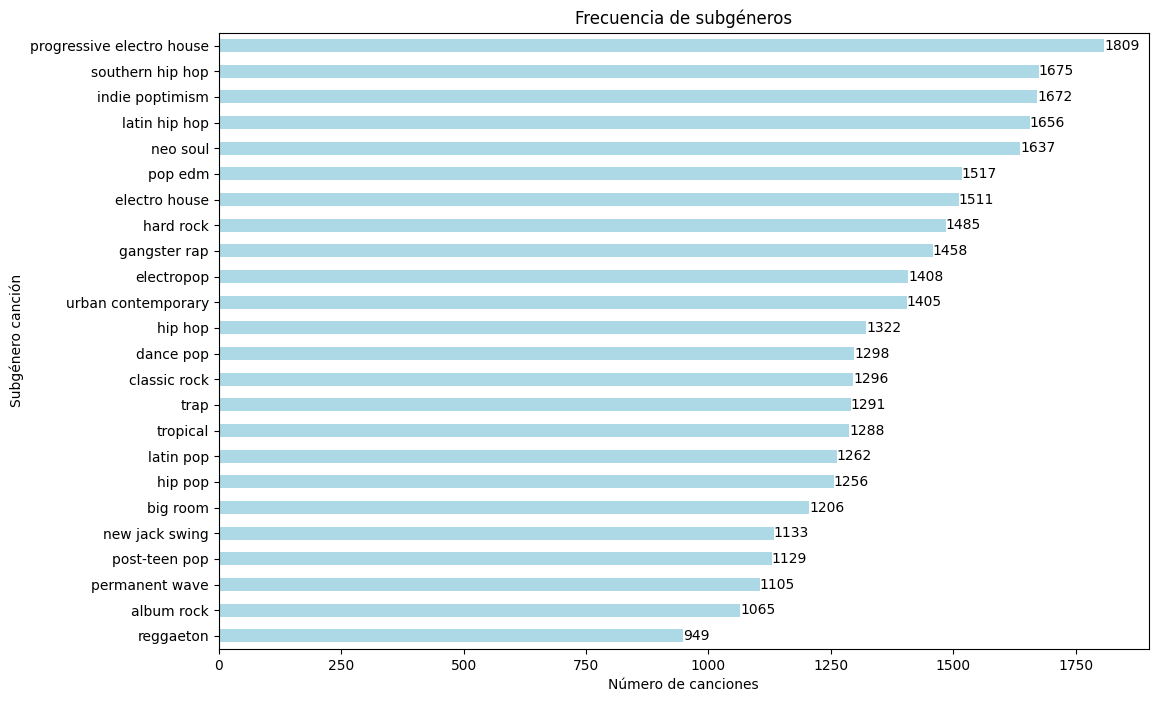

In [9]:
conteo_subgeneros = songs['playlist_subgenre'].value_counts()

conteo_subgeneros = conteo_subgeneros.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
conteo_subgeneros.plot(kind='barh', color='lightblue')

plt.gca().invert_yaxis()

for index, value in enumerate(conteo_subgeneros):
    plt.text(value, index, str(value), va='center', fontsize=10)

plt.title('Frecuencia de subgéneros')
plt.xlabel('Número de canciones')
plt.ylabel('Subgénero canción')

plt.show()

De igual forma, construimos un gráfico de torta para la variable binaria 'mode' o modalidad, como sigue:

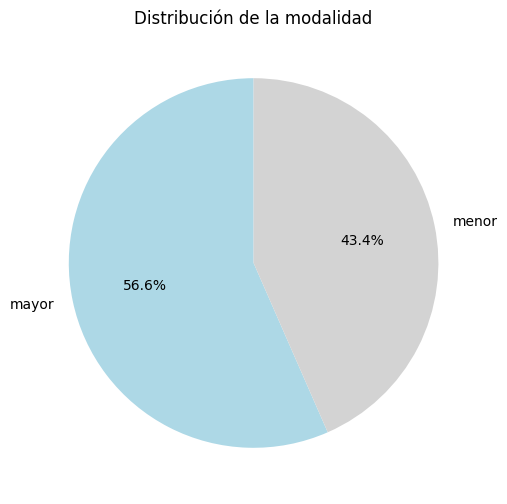

In [10]:
conteo_mode = songs['mode'].value_counts()

labels = ['mayor' if x == 1 else 'menor' for x in conteo_mode.index]

colors = ['lightblue' if label == 'mayor' else 'lightgray' for label in labels]

plt.figure(figsize=(6, 6))
plt.pie(conteo_mode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

plt.title('Distribución de la modalidad')

plt.show()

Finalmente, construimos histogramas para las variables numéricas:

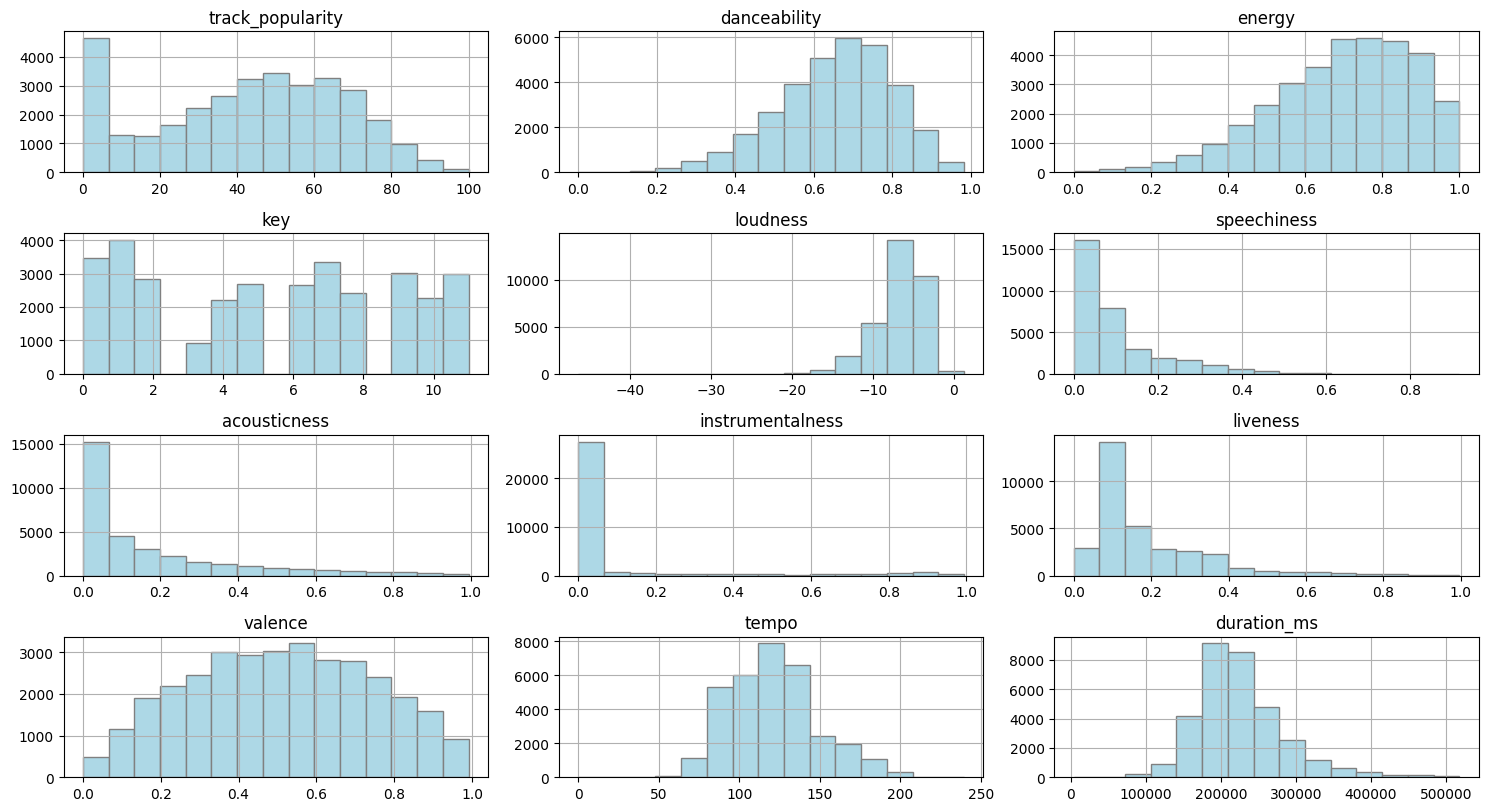

In [11]:
columnas_numericas = songs.select_dtypes(include=['number']).drop(columns=['mode']).columns

songs[columnas_numericas].hist(bins=15, color='lightblue', edgecolor='gray', figsize=(15, 10), layout=(len(columnas_numericas) // 3 + 1, 3))

plt.tight_layout()

plt.show()

### 3.4.3. Análisis de correlaciones

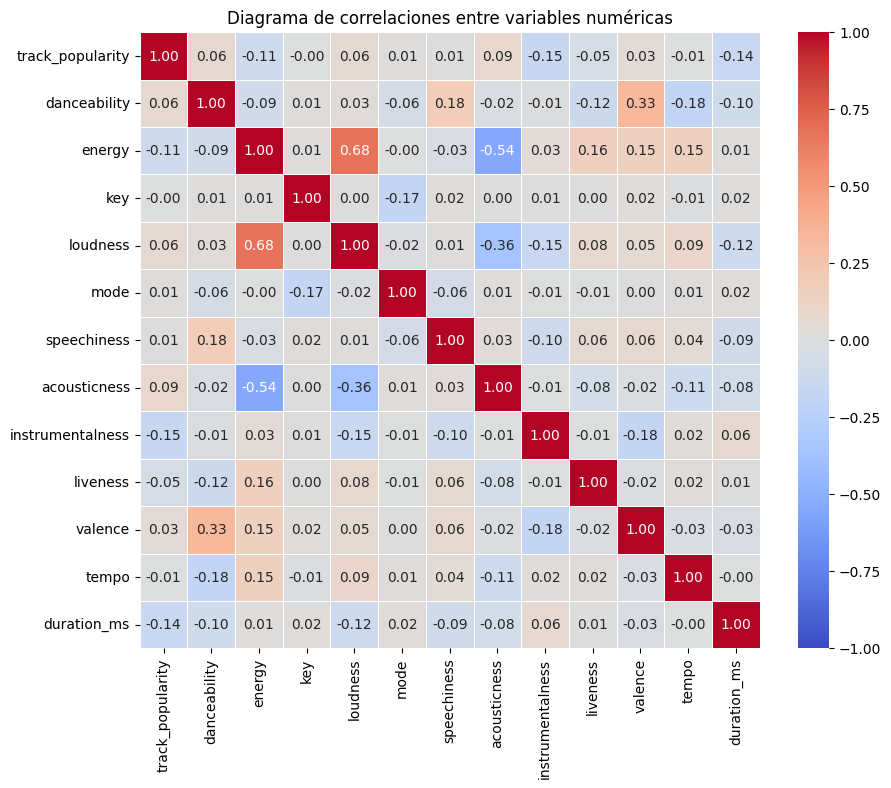

In [12]:
columnas_numericas = songs.select_dtypes(include=['number'])

matriz_correlaciones = columnas_numericas.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlaciones, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

plt.title('Diagrama de correlaciones entre variables numéricas')

plt.show()

## 4. PCA


In [13]:
#seleccion de variables numericas
variablesNumericas = songs[['track_id', 'track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','duration_ms']]

variablesNumericas.head()

,track_id,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,66,0.748,0.916,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,67,0.726,0.815,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,70,0.675,0.931,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,60,0.718,0.930,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,69,0.650,0.833,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [14]:
variablesNumericas.describe(include = "all")

,track_id,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
unique,28356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,7BKLCZ1jbUBVqRi2FVlTVw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,NaN,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,NaN,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,NaN,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,NaN,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,NaN,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000


In [15]:
#estandarizacion de variables
X = variablesNumericas.set_index("track_id")
mu = X.mean()
sigma = X.std()
Z = (X - mu)/sigma
Z.head()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
track_id,,,,,,,,,,,,,
6f807x0ima9a1j3VPbc7VN,0.941517,0.642039,1.201596,0.173197,1.367103,0.876164,-0.481355,-0.333893,-0.377947,-0.809217,0.031907,0.042926,-0.518866
0r7CVbZTWZgbTCYdfa2P31,0.981542,0.490404,0.643307,1.557603,0.585758,0.876164,-0.688631,-0.468663,-0.359172,1.081044,0.782510,-0.777186,-1.056252
1z1Hg7Vb0AhHDiEmnDE79l,1.101619,0.138887,1.284510,-1.211209,1.100073,-1.141305,-0.324417,-0.436792,-0.377843,-0.519554,0.439377,0.116225,-0.822004
75FpbthrwQmzHlBJLuGdC7,0.701364,0.435264,1.278982,0.450078,0.984294,0.876164,-0.050023,-0.667632,-0.377905,0.089580,-1.001780,0.039953,-0.947735
1e8PAfcKUYoKkxPhrHqw4x,1.061593,-0.033425,0.742804,-1.211209,0.685141,0.876164,-0.702450,-0.432694,-0.377947,-0.692574,0.919763,0.115035,-0.614163


In [16]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(Z)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)


[0.16596996 0.12326197 0.09410849 0.08935025 0.08075767 0.0761949
 0.07465375 0.06569427 0.06210284 0.06203355 0.04740531 0.04153368
 0.01693338]
[266.15528478 229.36909241 200.41708436 195.2847014  185.65738389
 180.33635337 178.50325972 167.44959281 162.8081224  162.71728027
 142.24396161 133.14367387  85.01433175]


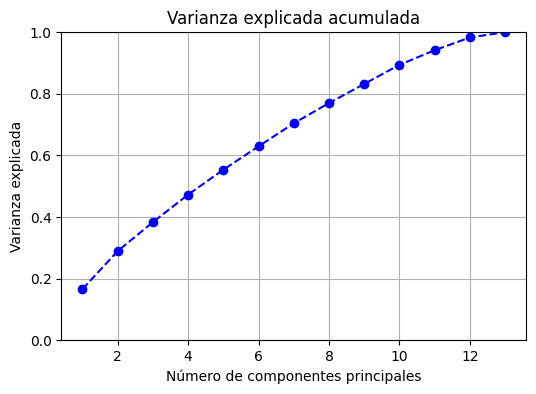

In [17]:
componentes = np.arange(1, len(pca.explained_variance_ratio_) + 1)

plt.figure(figsize=(6, 4))
plt.plot(componentes, np.cumsum(pca.explained_variance_ratio_), marker='o', color='b', linestyle='--')

plt.title('Varianza explicada acumulada')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada')

plt.ylim(0, 1)

plt.grid(True)
plt.show()

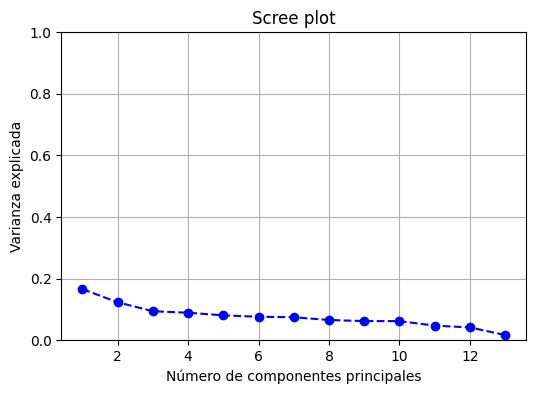

In [18]:
componentes = np.arange(1, len(pca.explained_variance_ratio_) + 1)

plt.figure(figsize=(6, 4))
plt.plot(componentes, pca.explained_variance_ratio_, marker='o', color='b', linestyle='--')

plt.title('Scree plot')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada')

plt.ylim(0, 1)

plt.grid(True)
plt.show()

## 5.Clustering

In [19]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
mat = Z.values



In [20]:
mat

array([[ 0.94151653,  0.64203931,  1.20159576, ...,  0.03190716,
         0.04292613, -0.51886567],
       [ 0.98154202,  0.4904044 ,  0.64330721, ...,  0.78250987,
        -0.77718643, -1.05625238],
       [ 1.10161851,  0.1388871 ,  1.2845099 , ...,  0.4393772 ,
         0.1162248 , -0.82200432],
       ...,
       [-1.13980932, -0.86741732,  0.67647287, ..., -0.31980382,
         0.26419743, -0.26218889],
       [-1.09978382, -0.19884521,  1.0468227 , ..., -0.86881609,
         0.26490366,  2.36708516],
       [-0.61947786, -0.35737261,  1.02471226, ..., -1.8064261 ,
         0.26401158,  1.86683452]])

In [21]:
varianza_intra_cluster = []
silhouettes = []
Y = {}
for k in range (2, 40): #
    kmeans = KMeans(n_clusters = k, random_state = 123, n_init=10).fit(mat)
    varianza_intra_cluster.append(kmeans.inertia_)
    try:
        silhouette = silhouette_score(mat, kmeans.labels_)
    except:
        silhouette = 0 # El índice de Silhouette sólo se puede calcular cuando se tiene K>1
    silhouettes.append(silhouette)
    Y[k] = kmeans.labels_

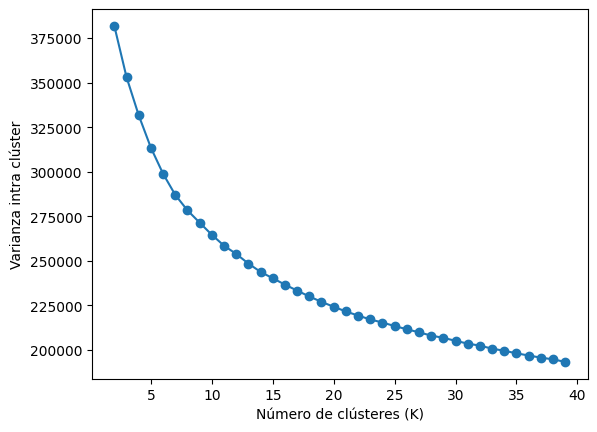

In [22]:
plt.plot(range(2, 40), varianza_intra_cluster, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Varianza intra clúster')
plt.show()

In [23]:
varianza_intra_cluster

[381800.97289971734,
 353105.46839180076,
 331674.94567776035,
 313459.09197623894,
 298837.5833546289,
 286981.00291907706,
 278306.26412912057,
 271399.3649485773,
 264590.48110470327,
 258469.5011184013,
 253839.8841682532,
 248435.642842801,
 243762.7068211674,
 240173.87270108354,
 236616.50801162247,
 233237.957471142,
 229967.3427855431,
 226923.1152382242,
 224191.47387151714,
 221538.57205942526,
 219247.97946659033,
 217062.4907711585,
 215327.01563612607,
 213365.2923827093,
 211562.50314364998,
 209833.2523720937,
 208006.6519303458,
 206730.79876973238,
 205074.37942575887,
 203492.65724251355,
 202367.51165350887,
 200652.57381566853,
 199483.66552027996,
 198046.7132243903,
 196823.26860352154,
 195628.29723342607,
 194673.12615912626,
 193223.72782032544]

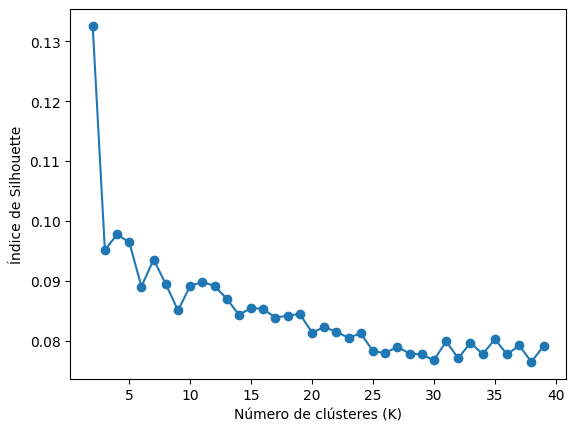

In [24]:
plt.plot(range(2, 40), silhouettes, marker='o')
plt.xlabel('Número de clústeres (K)')
plt.ylabel('Índice de Silhouette')
plt.show()

In [25]:
silhouettes

[0.13255094449112736,
 0.09515616093430487,
 0.09775356921693339,
 0.0964547320862002,
 0.08907348919105586,
 0.09357402121277336,
 0.08947433123242775,
 0.08508216656212408,
 0.08918552566028623,
 0.08983718969731173,
 0.08916953899658699,
 0.08702173624724859,
 0.08435377049477248,
 0.08548350068852292,
 0.08532465321669049,
 0.08386084122785818,
 0.08423398888548084,
 0.08447385122080794,
 0.08139046291854901,
 0.08228217522503141,
 0.08150766354020066,
 0.08052143017844939,
 0.08126126090260963,
 0.07827065444569063,
 0.07796277955597092,
 0.07902911518662831,
 0.07787526266595461,
 0.07773254115757532,
 0.07677877272324776,
 0.07990567027747678,
 0.07709132559971994,
 0.07972038634330167,
 0.0777716078922891,
 0.08029097425881376,
 0.07774343274861399,
 0.07923744795121289,
 0.07649091748633356,
 0.07917498683906596]

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from kneed import KneeLocator
import gower

In [32]:
#calculo de distancias y enlaces
dist = pdist(Z, metric='euclidean')
enlaces = linkage(dist, method='ward')

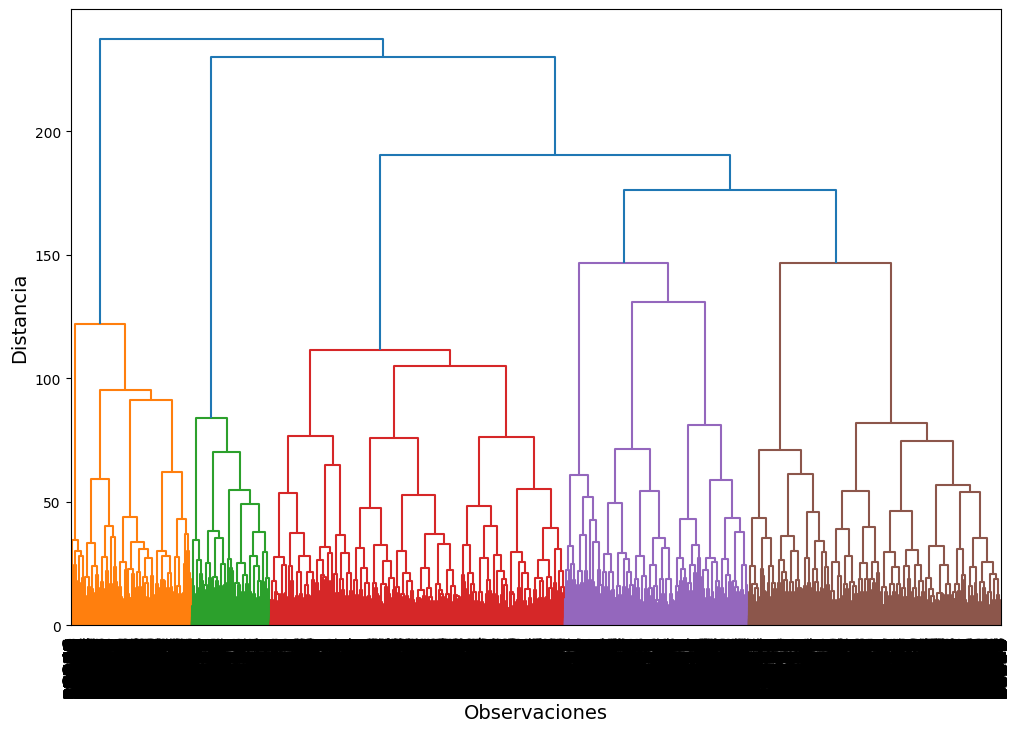

In [33]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram

fig, ax = plt.subplots(figsize=(12, 8))
d = dendrogram(enlaces, show_leaf_counts=True, leaf_font_size=14, ax=ax)
ax.set_xlabel('Observaciones', fontsize=14)
#ax.set_yticks(np.arange(0, 6, 0.25))
ax.set_ylabel('Distancia', fontsize=14)
plt.show()

## 6. Sistemas de Recomendacion:

### 6.1 Recomendacion por similitud coseno utilizando tracker_id

In [35]:
songs = songs.drop_duplicates(subset='track_id', keep='first')
songs

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-1.814,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,-4.462,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,6,-4.899,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,2,-3.361,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432


In [36]:
songs.columns

Index(['track_id', 'track_name', 'track_artist', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms'],
      dtype='object')

In [37]:
features = ['danceability', 'energy', 'key', 'loudness', 'speechiness',
            'acousticness', 'instrumentalness', 'liveness']

In [38]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(songs[features]), columns=features)
similarity_matrix = cosine_similarity(df_scaled)

In [39]:
def recommend_song_any_artist(track_id, songs, similarity_matrix, n_recommendations=5):
    # Obtenemos el índice de la canción
    idx = songs[songs['track_id'] == track_id].index[0]

    # Ordenamos las canciones por similitud
    similarity_scores = list(enumerate(similarity_matrix[idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    # Creamos una lista de canciones recomendadas
    recommended_songs = []

    for i, score in similarity_scores:
        song = songs.iloc[i]  # Cambiar aquí para usar iloc
        song_track_id = song['track_id']

        # Excluimos el track_id proporcionado
        if song_track_id != track_id:
            recommended_songs.append(song)

        # Si alcanzamos el número de recomendaciones deseado, detenemos el bucle
        if len(recommended_songs) >= n_recommendations:
            break

    # Convertimos la lista de recomendaciones en un DataFrame
    recommended_songs_df = pd.DataFrame(recommended_songs)

    return recommended_songs_df[['track_id', 'track_name', 'track_artist', 'playlist_genre']]


In [40]:
def recommend_song_same_artist(track_id, songs, similarity_matrix, n_recommendations=5):
    # Obtenemos el índice de la canción y el artista
    idx = songs[songs['track_id'] == track_id].index[0]
    artist = songs.iloc[idx]['track_artist']

    # Ordenamos las canciones por similitud
    similarity_scores = list(enumerate(similarity_matrix[idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    # Creamos una lista de canciones recomendadas
    recommended_songs = []

    for i, score in similarity_scores:
        song = songs.iloc[i]  # Cambiar aquí para usar iloc
        song_track_id = song['track_id']

        # Excluimos el track_id proporcionado y aseguramos que sea del mismo artista
        if song_track_id != track_id and song['track_artist'] == artist:
            recommended_songs.append(song)

        # Si alcanzamos el número de recomendaciones deseado, detenemos el bucle
        if len(recommended_songs) >= n_recommendations:
            break

    # Convertimos la lista de recomendaciones en un DataFrame
    recommended_songs_df = pd.DataFrame(recommended_songs)

    return recommended_songs_df[['track_id', 'track_name', 'track_artist', 'playlist_genre']]


In [41]:
def recommend_song_same_genre(track_id, songs, similarity_matrix, n_recommendations=5):
    # Obtenemos el índice de la canción y el género
    idx = songs[songs['track_id'] == track_id].index[0]
    genre = songs.iloc[idx]['playlist_genre']

    # Ordenamos las canciones por similitud
    similarity_scores = list(enumerate(similarity_matrix[idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    # Creamos una lista de canciones recomendadas
    recommended_songs = []

    for i, score in similarity_scores:
        song = songs.iloc[i]  # Cambiar aquí para usar iloc
        song_track_id = song['track_id']

        # Excluimos el track_id proporcionado y aseguramos que sea del mismo género
        if song_track_id != track_id and song['playlist_genre'] == genre:
            recommended_songs.append(song)

        # Si alcanzamos el número de recomendaciones deseado, detenemos el bucle
        if len(recommended_songs) >= n_recommendations:
            break

    # Convertimos la lista de recomendaciones en un DataFrame
    recommended_songs_df = pd.DataFrame(recommended_songs)

    return recommended_songs_df[['track_id', 'track_name', 'track_artist', 'playlist_genre']]


In [42]:
songs.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


In [43]:
recommend_song_any_artist('75FpbthrwQmzHlBJLuGdC7', songs, similarity_matrix)

,track_id,track_name,track_artist,playlist_genre
31439,6XtOpnP7gitKdibHXylwsC,I Don’t Like You - Nicky Romero Remix,Eva Simons,edm
27757,79Uq59YH1T7EJ16uWxK8Oc,Bathing Suit Body,Badpojken,edm
2129,6YZdkObH88npeKrrkb8Ggf,DUELE EL CORAZON,Enrique Iglesias,pop
27333,5NwWGVjLvbxJZrJLhcRqm1,Music Has the Power - Radio Edit,!deladap,edm
3014,48QmG1dfvMuYLxMPt7KSRA,No Lie,Sean Paul,pop


In [44]:
recommend_song_same_artist('75FpbthrwQmzHlBJLuGdC7', songs, similarity_matrix)

,track_id,track_name,track_artist,playlist_genre
29718,4B3NahKokb7lLkvaLFZFzn,Sick Boy - Owen Norton Remix,The Chainsmokers,edm
10915,33ecyF2OHCK4HFUSp1hItE,Closer - T-Mass Remix,The Chainsmokers,rap
30142,4Sdp10fc5XgHxL1VaiMVYN,Inside Out - DubVision Remix,The Chainsmokers,edm
24,4sqABRRGU7CzcHXCyxUzFw,Do You Mean (feat. Ty Dolla $ign & bülow) - My...,The Chainsmokers,pop
30110,1JI70l1lE5IF2tgJm5TnMD,Don't Let Me Down - Hardwell & Sephyx Remix,The Chainsmokers,edm


In [45]:
recommend_song_same_genre('75FpbthrwQmzHlBJLuGdC7', songs, similarity_matrix)

,track_id,track_name,track_artist,playlist_genre
2129,6YZdkObH88npeKrrkb8Ggf,DUELE EL CORAZON,Enrique Iglesias,pop
3014,48QmG1dfvMuYLxMPt7KSRA,No Lie,Sean Paul,pop
3825,5m5TRf7ggoguXtcXQGprN4,Written in the Stars (feat. Eric Turner),Tinie Tempah,pop
2497,3cFsmM51N5zMAuu1nNY4Tw,No Lie,Sean Paul,pop
3755,1jLsirPDkUS2g4gnkYua58,Ignite,Alan Walker,pop


### 6.2 Sistema de recomendacion basado en Edad y Genero

In [46]:
# Convertir 'track_album_release_date' a datetime y extraer el año
songs['track_album_release_date'] = pd.to_datetime(songs['track_album_release_date'], errors='coerce')
songs['album_year'] = songs['track_album_release_date'].dt.year

In [47]:
# Eliminar filas donde 'album_year' es NaN después de la conversión
songs = songs.dropna(subset=['album_year'])

# Convertir 'album_year' a entero
songs['album_year'] = songs['album_year'].astype(int)

<ipython-input-47-0b9273cac842>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  songs['album_year'] = songs['album_year'].astype(int)


In [54]:
from IPython.display import display
import ipywidgets as widgets
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from datetime import datetime

# Selección de características numéricas (en nuestra opinión) más relevantes para el modelo
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

# Normalización de las características numéricas
scaler = MinMaxScaler()
songs_scaled = songs.copy()
songs_scaled[features] = scaler.fit_transform(songs[features])

In [50]:
def get_music_preference_years(age):
    """
    Calcula el rango de años en el que el usuario desarrolló sus gustos musicales.
    """
    current_year = datetime.now().year
    start_year = current_year - age + 16
    end_year = current_year - age + 13


    return start_year, end_year

def recommend_songs(age, genre, df, features, n_recommendations=5):
    """
    Recomienda canciones basadas en la edad y género musical del usuario.
    """
    # Calcular el rango de años
    year_start, year_end = get_music_preference_years(age)

    print('Rango de años:', year_start, year_end)
    print('año y genero: ', age, genre)

    print('head del df songs', df.head())
    print('feature: ', features)


    # Filtrar canciones por género y rango de años
    filtered_songs_genre = songs_scaled.loc[
        (songs_scaled['playlist_genre'] == genre)
     ]

    filtered_songs_year = filtered_songs_genre.loc[
        (songs_scaled['album_year'] >= year_start) |
        (songs_scaled['album_year'] <= year_end)
    ]

    print(filtered_songs_year.columns)
    # Selección de características para la similitud
    #song_features = filtered_songs[features].values
    song_features = filtered_songs_year.loc[:, features].values

    print('Song_features: ', song_features)

    # Calcular la similitud de coseno
    similarity_matrix = cosine_similarity(song_features)

    # Seleccionar una canción aleatoria para la recomendación
    random_song_idx = np.random.randint(0, filtered_songs_year.shape[0])

    # Obtener las puntuaciones de similitud para la canción seleccionada
    similarity_scores = similarity_matrix[random_song_idx]

    # Obtener los índices de las canciones más similares
    similar_indices = similarity_scores.argsort()[::-1][1:n_recommendations+1]

    # Obtener las recomendaciones
    recommendations = filtered_songs_year.iloc[similar_indices][['track_name', 'track_artist', 'album_year', 'playlist_genre']]

    return recommendations

### 6.2.1 Interfaz Grafica

In [55]:
# Widgets interactivos
age_slider = widgets.IntSlider(min=18, max=100, step=1, description="Edad:", value=25)
genre_dropdown = widgets.Dropdown(options=sorted(songs_scaled['playlist_genre'].unique()), description="Género:")
recommend_button = widgets.Button(description="Recomendar Canciones")
output = widgets.Output()

# Función que se ejecuta al presionar el botón
def on_recommend_button_clicked(b):
    with output:
        output.clear_output()
        age = age_slider.value
        print('tipo y valor edad:', type(age), age)

        genre = genre_dropdown.value
        genre = genre_dropdown.value
        print('tipo y valor genero:', type(genre), genre)

        recommendations = recommend_songs(age, genre, songs_scaled, features)
        if isinstance(recommendations, str):
            print(recommendations)
        else:
            print("Recomendaciones:")
            display(recommendations)

recommend_button.on_click(on_recommend_button_clicked)

# Mostrar widgets
display(age_slider, genre_dropdown, recommend_button, output)

IntSlider(value=25, description='Edad:', min=18)

Dropdown(description='Género:', options=('edm', 'latin', 'pop', 'r&b', 'rap', 'rock'), value='edm')

Button(description='Recomendar Canciones', style=ButtonStyle())

Output()